In [2]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['FB','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    

In [7]:
GOOG.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,743.396150,749.140955,737.284426,743.239802,1836348.809524,743.239802
std,34.518287,33.573281,35.222677,34.226737,932891.609171,34.226737
min,667.849976,672.299988,663.059998,668.260010,586000.000000,668.260010
25%,716.072479,719.862503,706.364990,713.242493,1276675.000000,713.242493
50%,743.010010,747.089996,736.779999,742.845001,1587300.000000,742.845001
75%,773.075012,778.259995,768.255249,772.150024,2077850.000000,772.150024
max,816.679993,816.679993,805.140015,813.109985,6348100.000000,813.109985


In [9]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-12-28 to 2016-12-23
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


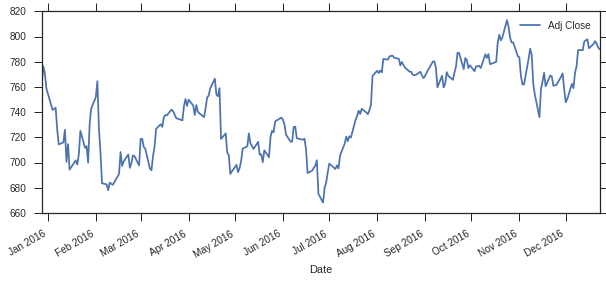

In [10]:
GOOG['Adj Close'].plot(legend=True,figsize=(10,4))

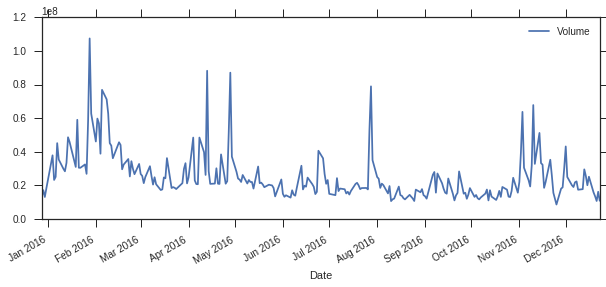

In [11]:
FB['Volume'].plot(legend=True,figsize=(10,4))

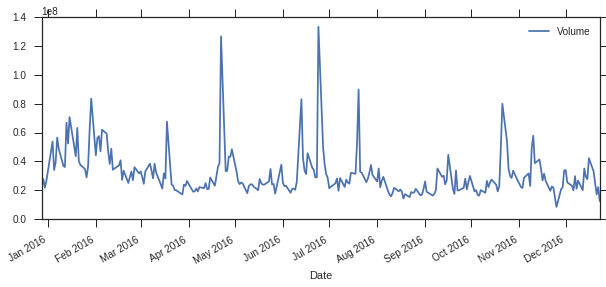

In [12]:
MSFT['Volume'].plot(legend=True,figsize=(10,4))

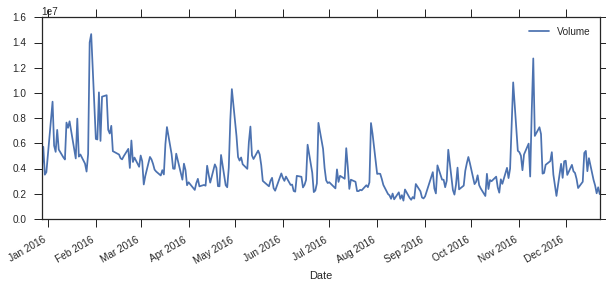

In [14]:
AMZN['Volume'].plot(legend=True,figsize=(10,4))

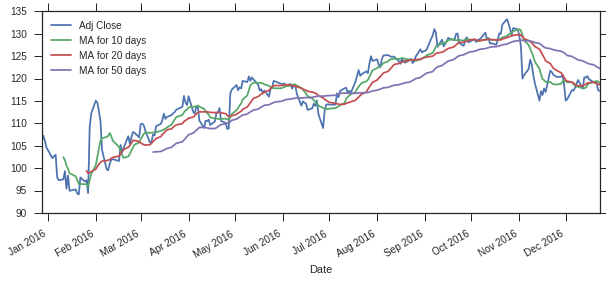

In [16]:
#plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    FB[column_name]=pd.rolling_mean(FB['Adj Close'],ma)

FB[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

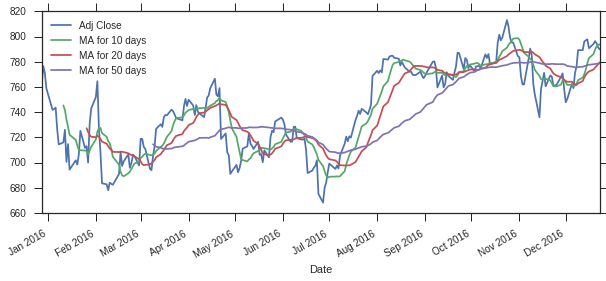

In [22]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    GOOG[column_name]=pd.rolling_mean( GOOG['Adj Close'],ma)

GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

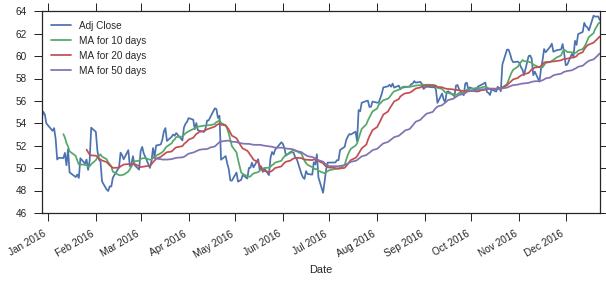

In [23]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    MSFT[column_name]=pd.rolling_mean(MSFT['Adj Close'],ma)

MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

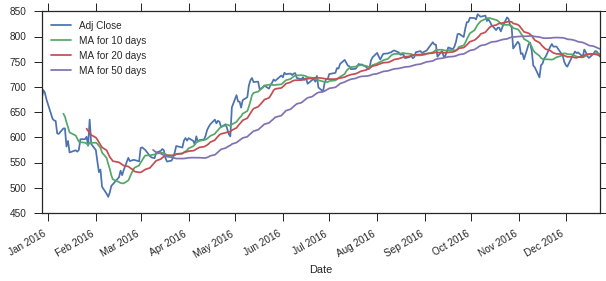

In [24]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AMZN[column_name]=pd.rolling_mean(AMZN['Adj Close'],ma)

AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [ ]:
#daily return analysis
# We'll use pct_change to find the percent change for each day
#AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
FB['Daily Return'] = FB['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
#AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')
FB['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')